In [ ]:
from google.colab import drive
# mounting google drive
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
import pandas as pd

#### Data Loading

In [ ]:
df1 = pd.read_csv('New_York_City_Restaurant_Inspection_Results.csv')
df1.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point', 'Zip Codes', 'Community Districts',
       'Borough Boundaries', 'City Council Districts', 'Police Precincts'],
      dtype='object')

In [ ]:
df1.drop(columns=['Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point', 'Zip Codes', 'Community Districts',
       'Borough Boundaries', 'City Council Districts', 'Police Precincts'], inplace=True)

In [ ]:
df2 = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df = pd.concat([df1,df2])

In [ ]:
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,50125929,NaN,Manhattan,456,GREENWICH STREET,10013.0,9174884291,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/04/2022,NaN
1,50115487,"Beard Papa's East Village, Inc.",Manhattan,11,SAINT MARKS PLACE,10003.0,7186834781,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/04/2022,NaN
2,50118370,NaN,Brooklyn,150,GRAND STREET,11249.0,2122031918,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/04/2022,NaN
3,50118454,NaN,Queens,4405,KISSENA BLVD,11355.0,9295103100,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/04/2022,NaN
4,40873175,CRAFT,Manhattan,4347,EAST 19 STREET,NaN,2127800880,American,09/27/2019,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,14.0,B,09/27/2019,11/04/2022,Cycle Inspection / Re-inspection


### Basic Exploration

In [ ]:
shape=df.shape
print(f'The dataset has {shape[1]} columns and {shape[0]} rows')

The dataset has 18 columns and 621680 rows


In [ ]:
df.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [ ]:
df.isnull().sum()

CAMIS                         0
DBA                        2127
BORO                          0
BUILDING                    771
STREET                       32
ZIPCODE                    9155
PHONE                        25
CUISINE DESCRIPTION        4171
INSPECTION DATE               0
ACTION                     5421
VIOLATION CODE            11680
VIOLATION DESCRIPTION     13847
CRITICAL FLAG                 0
SCORE                     30485
GRADE                    311036
GRADE DATE               320524
RECORD DATE                   0
INSPECTION TYPE            5421
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621680 entries, 0 to 386186
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  621680 non-null  int64  
 1   DBA                    619553 non-null  object 
 2   BORO                   621680 non-null  object 
 3   BUILDING               620909 non-null  object 
 4   STREET                 621648 non-null  object 
 5   ZIPCODE                612525 non-null  float64
 6   PHONE                  621655 non-null  object 
 7   CUISINE DESCRIPTION    617509 non-null  object 
 8   INSPECTION DATE        621680 non-null  object 
 9   ACTION                 616259 non-null  object 
 10  VIOLATION CODE         610000 non-null  object 
 11  VIOLATION DESCRIPTION  607833 non-null  object 
 12  CRITICAL FLAG          621680 non-null  object 
 13  SCORE                  591195 non-null  float64
 14  GRADE                  310644 non-nu

In [ ]:
# print count of duplicated rows
print(df.duplicated().sum())

14393


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CAMIS,621680.0,4.613275e+07,4.406788e+06,30075445.0,41391103.0,50006308.0,50058464.0,50129580.0
ZIPCODE,612525.0,1.068566e+04,5.959910e+02,7004.0,10022.0,10471.0,11229.0,14228.0
SCORE,591195.0,2.046439e+01,1.513424e+01,-1.0,11.0,16.0,26.0,172.0


### Dropping Duplicates, Columns, Rows

In [ ]:
# 14,257 duplicates found
df.drop_duplicates(inplace=True)
df.shape
# (221236, 32)

(607287, 18)

In [ ]:
# remove these rows from the main dataset
df = df[df['INSPECTION DATE'] != df['INSPECTION DATE'].min()]
df['INSPECTION DATE'].min()

'01/02/2018'

## Null Values

In [ ]:
df.isnull().sum()

CAMIS                         0
DBA                         531
BORO                          0
BUILDING                    708
STREET                        4
ZIPCODE                    8873
PHONE                        22
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                     1250
VIOLATION CODE             7508
VIOLATION DESCRIPTION      9541
CRITICAL FLAG                 0
SCORE                     25940
GRADE                    301019
GRADE DATE               310060
RECORD DATE                   0
INSPECTION TYPE            1250
dtype: int64

### Changing Null BORO

In [ ]:
# 3 Zipcodes are available for BORO = 0 
df.loc[df['BORO'] == '0']['ZIPCODE'].value_counts()

11249.0    33
10168.0     4
10285.0     2
Name: ZIPCODE, dtype: int64

In [ ]:
# Using the address on Google Maps, get the boro of the restaurants
df.loc[(df['BORO'] == '0') & (df['ZIPCODE'] == 11249), 'BORO'] = 'Brooklyn'
df.loc[(df['BORO'] == '0') & ((df['ZIPCODE'] == 10168) | (df['ZIPCODE'] == 10285)), 'BORO'] = 'Manhattan'

### Changing Null DBA

In [ ]:
# only 2 restaurants don't have their name mentioned
df[df['DBA'].isnull()]['CAMIS'].value_counts()

50079290    15
41650149    10
50088124     1
50087858     1
50087924     1
            ..
50086780     1
50086769     1
50086767     1
50086759     1
50088744     1
Name: CAMIS, Length: 508, dtype: int64

In [ ]:
# Using the address on Google Maps, get the name of the restaurants
#df.loc[df['CAMIS'] == 50079290] => 886
#df.loc[df['CAMIS'] == 41650149] => 83 1/2
df.loc[df['CAMIS'] == 50079290, 'DBA'] = '886'
df.loc[df['CAMIS'] == 41650149, 'DBA'] = '83 1/2'

### Changing Null Building

In [ ]:
df[df['BUILDING'].isnull()]['STREET'].value_counts()

JFK INTERNATIONAL AIRPORT         332
AMTRAK LEVEL                       48
ARTHUR AVE                         45
W 79 STREET                        40
JFK AIRPORT                        35
CENTRAL TERMINAL BUILDING          32
CENTRAL PARK WEST                  22
TERM8-A1                           20
US AIRWAYS TERMINAL                20
AIRPORT TERMINAL 4                 17
Park N. Moore St. at West S        15
37TH AVE                           13
AND WEST SIDE HIGHWAY              11
LEXINGTON AVE                      11
10TH AVE                            9
ROOSEVELT AVENUE                    7
TERMINAL C LEVEL 2 CONCOURSE E      4
MARINE TER, LA GARDIA AIRPORT       3
Terminal 5                          3
/LOWER LEVEL                        3
TERMINAL C CONCOURSE E              2
TERMINAL C LEVEL 3 CONCOURSE E      2
TERMINAL C HEADHOUSE BAGGAGE        1
BATTERY PARK THE BOSQUE AREA        1
TERMINAL C HEADHOUSE LEVEL 3        1
WEST 30TH ST                        1
WEST 15TH ST

In [ ]:
# for JFK zipcode = 11430
df.loc[df['STREET'] == 'JFK AIRPORT', 'STREET'] = 'JFK INTERNATIONAL AIRPORT'
#df.loc[df['STREET'] == 'JFK INTERNATIONAL AIRPORT']['ZIPCODE'].value_counts()

In [ ]:
df['BUILDING'] = df['BUILDING'].fillna("")

### Changing Null Phone

In [ ]:
#df[df['PHONE'].isnull()]['CAMIS'].value_counts()

In [ ]:
df.loc[df['CAMIS'] == 41512878, 'PHONE'] = 9179091231
df.loc[df['CAMIS'] == 50064842, 'PHONE'] = ''

### Changing Null Violation Code/Description

In [ ]:
df['VIOLATION CODE'].value_counts()

10F      84620
08A      66352
04L      43754
06D      41437
06C      37875
         ...  
20C          1
20-07        1
06J          1
15-36        1
15G          1
Name: VIOLATION CODE, Length: 149, dtype: int64

##### Inspecting the values of other col when code is null

In [ ]:
df[df['VIOLATION CODE'].isna()]['ACTION'].value_counts()
# most of the null VIOLATION CODE has ACTION = No violation

No violations were recorded at the time of this inspection.    5774
Establishment re-opened by DOHMH                                319
Establishment re-opened by DOHMH.                               110
Violations were cited in the following area(s).                  54
Establishment re-closed by DOHMH                                  1
Name: ACTION, dtype: int64

In [ ]:
df[df['VIOLATION CODE'].isna()]['GRADE'].value_counts()
# most of the null VIOLATION CODE has GRADE = A

A                 1116
P                  257
C                   78
Z                   63
N                   15
Not Yet Graded      12
B                    1
Name: GRADE, dtype: int64

In [ ]:
df[df['VIOLATION CODE'].isna()]['SCORE'].value_counts()
# most of the null VIOLATION CODE has SCORE = 0

0.0     2374
33.0       4
29.0       2
22.0       2
21.0       1
7.0        1
17.0       1
10.0       1
38.0       1
12.0       1
Name: SCORE, dtype: int64

In [ ]:
df[(df['VIOLATION CODE'].isna()) & (df['GRADE'].isna())].shape

(5966, 18)

In [ ]:
df[df['VIOLATION CODE'].isna()]['INSPECTION TYPE'].value_counts()
# most of the null VIOLATION CODE has INSPECTION TYPE ~ Initial Inspection

Administrative Miscellaneous / Initial Inspection              2248
Cycle Inspection / Initial Inspection                           919
Administrative Miscellaneous / Re-inspection                    547
Trans Fat / Initial Inspection                                  488
Cycle Inspection / Reopening Inspection                         337
Inter-Agency Task Force / Initial Inspection                    288
Cycle Inspection / Re-inspection                                259
Pre-permit (Operational) / Initial Inspection                   179
Trans Fat / Re-inspection                                       166
Pre-permit (Non-operational) / Initial Inspection               145
Smoke-Free Air Act / Initial Inspection                         121
Pre-permit (Operational) / Reopening Inspection                  98
Pre-permit (Operational) / Re-inspection                         88
Trans Fat / Compliance Inspection                                75
Administrative Miscellaneous / Compliance Inspec

In [ ]:
df[df['ACTION'] == 'No violations were recorded at the time of this inspection.']['VIOLATION CODE'].value_counts()

20D      108
22C      101
22A       41
20A       39
15F       16
16B        9
15L        9
18F        7
18G        6
15F7       5
18-11      4
15I        4
16D        3
22B        3
16C        3
15F6       3
20-01      3
28-03      2
16E        2
15-27      1
22G        1
20B        1
10F        1
22F        1
04L        1
06C        1
08A        1
20F        1
10B        1
22E        1
Name: VIOLATION CODE, dtype: int64

In [ ]:
df[df['VIOLATION CODE'] == '20D']['VIOLATION DESCRIPTION'].value_counts()

Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.    1199
“Choking first aid” poster not posted. “Alcohol and pregnancy” warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted.                                       754
Name: VIOLATION DESCRIPTION, dtype: int64

In [ ]:
df[df['ACTION'] == 'No violations were recorded at the time of this inspection.'][['GRADE', 'SCORE', 'VIOLATION CODE', 'VIOLATION DESCRIPTION']].value_counts()

GRADE  SCORE  VIOLATION CODE  VIOLATION DESCRIPTION                                       
A      0.0    22G             Sale or use of certain expanded polystyrene items restricted    1
dtype: int64

In [ ]:
df[df['ACTION'] == 'No violations were recorded at the time of this inspection.'][['VIOLATION CODE', 'VIOLATION DESCRIPTION']].value_counts()

VIOLATION CODE  VIOLATION DESCRIPTION                                                                                                                                                                                                                                                                                                                                                   
22C             Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.                                                                                                                                                                                                                                        101
20D             Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not 

In [ ]:
# Establishment re-opened by DOHMH.
df[df['ACTION'] == 'Establishment re-opened by DOHMH.']['VIOLATION CODE'].value_counts()

10F      676
08A      378
04L      219
04M      159
10B      149
06C       73
04N       72
06D       62
08C       31
09C       29
10H       21
04H       19
02G       18
10D       18
04K       13
10I       10
10A        9
10G        6
20D        6
10E        6
10J        4
09A        3
10C        3
20A        3
06E        3
04J        2
22C        2
05D        2
08B        2
22A        2
06F        2
28-05      1
02D        1
18C        1
06B        1
20-04      1
04E        1
28-03      1
05H        1
22F        1
02A        1
Name: VIOLATION CODE, dtype: int64

In [ ]:
df.loc[(df['VIOLATION CODE'].isna()) & (df['ACTION'] == 'Establishment re-opened by DOHMH.')]['SCORE'].value_counts()

0.0    110
Name: SCORE, dtype: int64

In [ ]:
df.loc[df['SCORE'] == 0]['VIOLATION CODE'].value_counts()

08A    806
10F    597
04L    538
02G    471
06D    351
      ... 
03I      1
06H      1
09D      1
22G      1
07A      1
Name: VIOLATION CODE, Length: 61, dtype: int64

In [ ]:
df.loc[(df['SCORE'] == 0) & (df['VIOLATION CODE'] == 0)]['VIOLATION DESCRIPTION'].value_counts()

Series([], Name: VIOLATION DESCRIPTION, dtype: int64)

In [ ]:
df.loc[(df['SCORE'] == 0) & (df['ACTION'] == 'Establishment re-opened by DOHMH.')]['VIOLATION CODE'].value_counts()

Series([], Name: VIOLATION CODE, dtype: int64)

In [ ]:
# Violations were cited in the following area(s).
df[df['ACTION'] == 'Violations were cited in the following area(s).']['VIOLATION CODE'].value_counts()

10F      81062
08A      61814
04L      40529
06D      40357
06C      36274
         ...  
20-02        1
15-32        1
20B          1
16F          1
15G          1
Name: VIOLATION CODE, Length: 149, dtype: int64

In [ ]:
df.loc[(df['VIOLATION CODE'].isna()) & (df['ACTION'] == 'Violations were cited in the following area(s).')]['SCORE'].value_counts()

0.0    50
Name: SCORE, dtype: int64

In [ ]:
df.loc[(df['SCORE'] == 0) & (df['ACTION'] == 'Violations were cited in the following area(s).')]['VIOLATION CODE'].value_counts()
# TOP 4
#08A      767
#10F      575
#04L      511
#02G      450

08A      773
10F      579
04L      516
02G      453
06D      341
02B      333
04N      311
10B      297
06C      296
04A      209
04M      202
04H      164
08C      143
06A      134
06E       95
02H       90
04K       85
05D       83
06F       62
10H       62
09C       47
04C       40
09B       38
04J       38
10I       35
10D       32
10E       27
10G       22
06B       20
10J       19
05H       19
03A       18
05F       13
05A       11
10A       11
02C       11
09A       10
04F        8
10C        8
08B        8
02I        7
04O        6
02A        5
04E        3
03B        3
05E        3
09E        3
05B        2
05C        2
28-06      2
22F        2
02D        2
28-05      2
06G        1
04D        1
03I        1
09D        1
07A        1
03D        1
Name: VIOLATION CODE, dtype: int64

In [ ]:
df.loc[df['VIOLATION CODE'] == '08A']['VIOLATION DESCRIPTION'].value_counts()

Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.    62225
Establishment is not free of harborage or conditions conducive to rodents, insects or other pests.                                     4127
Name: VIOLATION DESCRIPTION, dtype: int64

##### Changing the null values

In [ ]:
# where No Violation replace null code with 0
df.loc[(df['VIOLATION CODE'].isna()) & (df['ACTION'] == 'No violations were recorded at the time of this inspection.'), ['VIOLATION CODE']] = '0'
df.loc[(df['VIOLATION DESCRIPTION'].isna()) & (df['ACTION'] == 'No violations were recorded at the time of this inspection.'), ['VIOLATION DESCRIPTION']] = 'No violations'

In [ ]:
df[df['ACTION'] == 'No violations were recorded at the time of this inspection.']['VIOLATION CODE'].value_counts()

0        5774
20D       108
22C       101
22A        41
20A        39
15F        16
15L         9
16B         9
18F         7
18G         6
15F7        5
18-11       4
15I         4
20-01       3
16D         3
15F6        3
22B         3
16C         3
16E         2
28-03       2
06C         1
10B         1
08A         1
20B         1
04L         1
10F         1
15-27       1
22G         1
22F         1
20F         1
22E         1
Name: VIOLATION CODE, dtype: int64

In [ ]:
# where establishment reopened replace null codes by 0
df.loc[(df['VIOLATION CODE'].isna()) & (df['ACTION'] == 'Establishment re-opened by DOHMH.'), ['VIOLATION CODE']] = '0'
df.loc[(df['VIOLATION DESCRIPTION'].isna()) & (df['ACTION'] == 'Establishment re-opened by DOHMH.'), ['VIOLATION DESCRIPTION']] = 'No violations'

In [ ]:
# where violations cited replace by most common code 08A
df.loc[(df['VIOLATION CODE'].isna()) & (df['ACTION'] == 'Violations were cited in the following area(s).'), ['VIOLATION CODE']] = '08A'
df.loc[(df['VIOLATION DESCRIPTION'].isna()) & (df['ACTION'] == 'Violations were cited in the following area(s).'), ['VIOLATION DESCRIPTION']] = df.loc[df['VIOLATION CODE'] == '08A']['VIOLATION DESCRIPTION'].value_counts().index[0]

In [ ]:
df.isnull().sum()

CAMIS                         0
DBA                         506
BORO                          0
BUILDING                      0
STREET                        4
ZIPCODE                    8873
PHONE                         3
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                     1250
VIOLATION CODE             1570
VIOLATION DESCRIPTION      1601
CRITICAL FLAG                 0
SCORE                     25940
GRADE                    301019
GRADE DATE               310060
RECORD DATE                   0
INSPECTION TYPE            1250
dtype: int64

In [ ]:
'''
# when VIOLATION CODE is null & ['ACTION'] == 'No violations... 
# randomly assign VIOLATION CODE to the top values found in the dataset 
# (20D, 22C, 22A, 20A) + corresponding DESCRIPTION
NoViolation_Code_Desc = df[df['ACTION'] == 'No violations were recorded at the time of this inspection.'][['VIOLATION CODE', 'VIOLATION DESCRIPTION']].value_counts()
top4_NoViolation_Code_Desc = pd.DataFrame(NoViolation_Code_Desc.head(4))
top4_NoViolation_Code_Desc

tot_NoV_nullCode = df[df['VIOLATION CODE'].isna()]['ACTION'].value_counts()[0]
code20D = round(tot_NoV_nullCode*top4_NoViolation_Code_Desc[0][0] / top4_NoViolation_Code_Desc[0].sum())
code22C= round(tot_NoV_nullCode*top4_NoViolation_Code_Desc[0][1] / top4_NoViolation_Code_Desc[0].sum())
code22A = round(tot_NoV_nullCode*top4_NoViolation_Code_Desc[0][2] / top4_NoViolation_Code_Desc[0].sum())
code20A = round(tot_NoV_nullCode*top4_NoViolation_Code_Desc[0][3] / top4_NoViolation_Code_Desc[0].sum())
# DISTRIBUTION
# tot = 1446
# sum = 74
# 20D => 33/74
# 22C => 18/74
# 22A => 14/74
# 20A => 9/74

cond_NoV = ((df['VIOLATION CODE'].isna()) & (df['ACTION'] == 'No violations were recorded at the time of this inspection.'))

# code 20D
df['VIOLATION CODE'].mask(cond_NoV.sample(n=645), '20D', inplace=True)
# code 22C
df['VIOLATION CODE'].mask(((df['VIOLATION CODE'].isna()) & (df['ACTION'] == 'No violations were recorded at the time of this inspection.')).sample(n=code22C), '22C', inplace=True)
# code 22A
df['VIOLATION CODE'].mask(((df['VIOLATION CODE'].isna()) & (df['ACTION'] == 'No violations were recorded at the time of this inspection.')).sample(n=code22A), '22A', inplace=True)
# code 20A
df['VIOLATION CODE'].mask(((df['VIOLATION CODE'].isna()) & (df['ACTION'] == 'No violations were recorded at the time of this inspection.')).sample(n=code20A), '20A', inplace=True)'''

"\n# when VIOLATION CODE is null & ['ACTION'] == 'No violations... \n# randomly assign VIOLATION CODE to the top values found in the dataset \n# (20D, 22C, 22A, 20A) + corresponding DESCRIPTION\nNoViolation_Code_Desc = df[df['ACTION'] == 'No violations were recorded at the time of this inspection.'][['VIOLATION CODE', 'VIOLATION DESCRIPTION']].value_counts()\ntop4_NoViolation_Code_Desc = pd.DataFrame(NoViolation_Code_Desc.head(4))\ntop4_NoViolation_Code_Desc\n\ntot_NoV_nullCode = df[df['VIOLATION CODE'].isna()]['ACTION'].value_counts()[0]\ncode20D = round(tot_NoV_nullCode*top4_NoViolation_Code_Desc[0][0] / top4_NoViolation_Code_Desc[0].sum())\ncode22C= round(tot_NoV_nullCode*top4_NoViolation_Code_Desc[0][1] / top4_NoViolation_Code_Desc[0].sum())\ncode22A = round(tot_NoV_nullCode*top4_NoViolation_Code_Desc[0][2] / top4_NoViolation_Code_Desc[0].sum())\ncode20A = round(tot_NoV_nullCode*top4_NoViolation_Code_Desc[0][3] / top4_NoViolation_Code_Desc[0].sum())\n# DISTRIBUTION\n# tot = 1446\n#

##### Extras

In [ ]:
df[df['VIOLATION CODE'].isna()]['ACTION'].value_counts()

Establishment re-opened by DOHMH    319
Establishment re-closed by DOHMH      1
Name: ACTION, dtype: int64

In [ ]:
df[df['ACTION'] == 'No violations were recorded at the time of this inspection.']['GRADE'].value_counts()

A                 1071
N                   15
Not Yet Graded      12
Name: GRADE, dtype: int64

In [ ]:
df[df['ACTION'] == 'No violations were recorded at the time of this inspection.']['SCORE'].value_counts()

0.0     1898
33.0       4
29.0       2
22.0       2
2.0        2
21.0       1
7.0        1
17.0       1
10.0       1
38.0       1
12.0       1
Name: SCORE, dtype: int64

In [ ]:
df[df['GRADE'] == 'A']['VIOLATION CODE'].value_counts()

10F      53644
08A      20366
06D      20332
10B      17786
06C      17598
         ...  
09D          1
19A1         1
17A          1
02E          1
28-07        1
Name: VIOLATION CODE, Length: 74, dtype: int64

In [ ]:
df[df['SCORE'] == 0]['GRADE'].value_counts()

A                 2372
N                  392
P                  257
C                   83
Z                   63
Not Yet Graded      12
B                    7
Name: GRADE, dtype: int64

In [ ]:
df.loc[(df['GRADE'] == 'A') & (df['SCORE'] == 0) & (df['ACTION'] == 'No violations were recorded at the time of this inspection.')]['VIOLATION DESCRIPTION'].value_counts()

No violations                                                   1066
Sale or use of certain expanded polystyrene items restricted       1
Name: VIOLATION DESCRIPTION, dtype: int64

In [ ]:
df[df['VIOLATION CODE'].isna()][['GRADE', 'SCORE', 'ACTION']].value_counts()

GRADE  SCORE  ACTION                          
P      0.0    Establishment re-opened by DOHMH    208
C      0.0    Establishment re-opened by DOHMH     64
Z      0.0    Establishment re-opened by DOHMH     22
B      0.0    Establishment re-opened by DOHMH      1
dtype: int64

In [ ]:
#df[df['VIOLATION CODE'].isna()]['VIOLATION DESCRIPTION'].value_counts()
# all NaN VIOLATION CODE have NaN VIOLATION DESCRIPTION

In [ ]:
# getting the rows that have no action recorded and no violation code
no_violation = df.loc[df['ACTION'] == 'No violations were recorded at the time of this inspection.']
no_violation[no_violation['VIOLATION CODE'].isna()]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE


In [ ]:
df[df['VIOLATION CODE'].isna()][['VIOLATION DESCRIPTION','SCORE', 'GRADE']]

,VIOLATION DESCRIPTION,SCORE,GRADE
1637,NaN,0.0,P
3410,NaN,0.0,P
4753,NaN,0.0,P
5992,NaN,0.0,Z
8275,NaN,0.0,P
...,...,...,...
386182,NaN,NaN,NaN
386183,NaN,NaN,NaN
386184,NaN,NaN,NaN
386185,NaN,NaN,NaN


In [ ]:
pd.set_option('display.max_columns',None)
df[df['SCORE'].isna()]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
87,50043859,NEW EAST STAR,Bronx,987,WESTCHESTER AVENUE,10459.0,7185894338,Chinese,04/18/2018,No violations were recorded at the time of thi...,0,No violations,Not Applicable,NaN,NaN,NaN,11/04/2022,Trans Fat / Re-inspection
113,41225392,BAYARD'S ALEHOUSE,Manhattan,533,HUDSON STREET,10014.0,2129890313,American,04/21/2022,Violations were cited in the following area(s).,20F,Current letter grade sign not posted.,Not Critical,NaN,NaN,NaN,11/04/2022,Administrative Miscellaneous / Re-inspection
134,50013086,POLLO D' ORO,Brooklyn,306,GOLD STREET,11201.0,7188558088,Spanish,04/15/2019,No violations were recorded at the time of thi...,0,No violations,Not Applicable,NaN,NaN,NaN,11/04/2022,Administrative Miscellaneous / Initial Inspection
146,50005981,AROMA DE CAFE BAKERY,Queens,8102,BROADWAY,11373.0,7188061999,Latin American,08/01/2019,No violations were recorded at the time of thi...,0,No violations,Not Applicable,NaN,NaN,NaN,11/04/2022,Administrative Miscellaneous / Re-inspection
169,41692608,SWEET CHICK,Brooklyn,164,BEDFORD AVENUE,11249.0,3477254793,American,01/06/2020,Violations were cited in the following area(s).,20F,Current letter grade sign not posted.,Not Critical,NaN,NaN,NaN,11/04/2022,Administrative Miscellaneous / Re-inspection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386182,50088737,NaN,MANHATTAN,575,8TH AVE,10018.0,9172614534,Other,1/1/00,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,2/18/19,NaN
386183,50088740,CHILLATO,QUEENS,1716,154TH ST,11357.0,9172829715,Other,1/1/00,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,2/18/19,NaN
386184,50088743,NaN,QUEENS,9225,UNION HALL ST,11433.0,7182106386,Other,1/1/00,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,2/18/19,NaN
386185,50088744,NaN,STATEN ISLAND,337,NEW DORP LN,10306.0,9173328987,Other,1/1/00,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,2/18/19,NaN


In [ ]:
# NaN values in 'Grade' means not graded yet

### Investigate IDs

In [ ]:
# IDs that were repeated only one time
CAMIS_count = df['CAMIS'].value_counts()
CAMIS_one = df[df['CAMIS'].isin(CAMIS_count.index[CAMIS_count < 2])]
CAMIS_one.shape

(1283, 18)

In [ ]:
CAMIS_one.isnull().sum()

CAMIS                      0
DBA                      267
BORO                       0
BUILDING                   0
STREET                     2
ZIPCODE                   22
PHONE                      3
CUISINE DESCRIPTION        0
INSPECTION DATE            0
ACTION                   641
VIOLATION CODE           641
VIOLATION DESCRIPTION    641
CRITICAL FLAG              0
SCORE                    642
GRADE                    641
GRADE DATE               762
RECORD DATE                0
INSPECTION TYPE          641
dtype: int64

##### CAMIS appears 1 time - null Zipcode

In [ ]:
CAMIS_one.loc[CAMIS_one['ZIPCODE'].isnull()]['STREET'].value_counts()

65TH ST TRANSVERSE                  4
65TH STREET TRANSVERSE              2
SAINT MARKS PL                      1
WHITE PLAINS RD                     1
AVE AMERICAS                        1
65 ST TRANSVERSE                    1
65TH ST TRAVERSE                    1
CLINTON ST                          1
36TH ST                             1
W 11TH AVE CHELSEA PIERS            1
AVENUE U                            1
BROADWAY  BETWEEN 42ND & 43RD ST    1
BROADWAY BTWN 42ND-43RD ST          1
MAIN TERMINAL                       1
JFK INTERNATIONAL AIRPORT           1
HUDSON YARDS                        1
Name: STREET, dtype: int64

In [ ]:
df.loc[(df['STREET'] == '65TH ST TRANSVERSE') | (df['STREET'] == '65 ST TRANSVERSE') | (df['STREET'] == '65TH ST TRAVERSE'), 'STREET'] = '65TH STREET TRANSVERSE'

In [ ]:
df.loc[df['STREET'] == '65TH STREET TRANSVERSE', 'ZIPCODE'] = 10019

### Changing Null Zipcode

#### Thru Street

In [ ]:
df.loc[df['ZIPCODE'].isnull()]['STREET'].value_counts()

FREDERICK DOUGLASS BOULEVARD        495
ADAM CLAYTON POWELL JR BOULEVARD    304
126TH ST & ROOSEVELT AVENUE         165
FLATBUSH AVENUE                     133
2 AVENUE                            120
                                   ... 
BEDFORD STREET                        1
BROADWAY BTWN 42ND-43RD ST            1
MAIN TERMINAL                         1
CENTRAL TERMINAL AREA  #A             1
SAINT MARKS PL                        1
Name: STREET, Length: 343, dtype: int64

In [ ]:
df.loc[df['ZIPCODE'].isnull()]['STREET'].value_counts()

FREDERICK DOUGLASS BOULEVARD        495
ADAM CLAYTON POWELL JR BOULEVARD    304
126TH ST & ROOSEVELT AVENUE         165
FLATBUSH AVENUE                     133
2 AVENUE                            120
                                   ... 
BEDFORD STREET                        1
BROADWAY BTWN 42ND-43RD ST            1
MAIN TERMINAL                         1
CENTRAL TERMINAL AREA  #A             1
SAINT MARKS PL                        1
Name: STREET, Length: 343, dtype: int64

In [ ]:
df.loc[((df['STREET'] == 'FREDERICK DOUGLASS BOULEVARD') & (df['BUILDING'] == 2530)), 'ZIPCODE'] = 10037
df.loc[(df['STREET'] == 'FREDERICK DOUGLASS BOULEVARD') & 
       (df['BUILDING'] == (2733 or 2801 or 2795 or 2835)), 'ZIPCODE'
       ] = 10039
df.loc[
    (df['STREET'] == 'FREDERICK DOUGLASS BOULEVARD') &
    (df['BUILDING'] == (2090 or 2143 or 2200 or 2128 or 2115 or 2084 or 2113 or 2100 or 2103 or 2220 or 2149 or 2166 or 2099 or 2224 or 2217 or 2104 or
     2118 or 2165 or 2190 or 2080)), 'ZIPCODE'] = 10026
df.loc[(df['STREET'] == 'FREDERICK DOUGLASS BOULEVARD') &
       (df['BUILDING'] == (2461 or 2272 or 2288 or 2264 or 2451 or 2292 or 2280 or 2296)), 'ZIPCODE'
       ] = 10027
df.loc[(df['STREET'] == 'FREDERICK DOUGLASS BOULEVARD') &
       (df['BUILDING'] == (2546 or 2620 or 2726 or 2494)), 'ZIPCODE'] = 10030

In [ ]:
df.loc[(df['STREET'] == 'ADAM CLAYTON POWELL JR BOULEVARD') & 
       (df['BUILDING'] == (1838 or 1944 or 1943 or 1890)), 'ZIPCODE'] = 10026
df.loc[(df['STREET'] == 'ADAM CLAYTON POWELL JR BOULEVARD') & 
       (df['BUILDING'] == (2245 or 2077 or 2057 or 2071 or 2249 or 2143 or 2167 or 2060)), 'ZIPCODE'] = 10027
df.loc[(df['STREET'] == 'ADAM CLAYTON POWELL JR BOULEVARD') & (df['BUILDING'] == 2554), 'ZIPCODE'] = 10037
df.loc[(df['STREET'] == 'ADAM CLAYTON POWELL JR BOULEVARD') & (df['BUILDING'] == (2261 or 2446 or 2374 or 2300 or 2267 or 2453 or 2280 or 2268 or 2379)), 
       'ZIPCODE'] = 10030
df.loc[(df['STREET'] == 'ADAM CLAYTON POWELL JR BOULEVARD') & (df['BUILDING'] == (2529 or 2519 or 2528 or 2509)), 'ZIPCODE'] = 10039

In [ ]:
df.loc[(df['STREET'] == '126TH ST & ROOSEVELT AVENUE'), 'ZIPCODE'] = 11368

In [ ]:
df.loc[(df['STREET'] == 'AVE AMERICAS') & (df['BUILDING'] == 1290), 'ZIPCODE'] = 10104
df.loc[(df['STREET'] == 'AVE AMERICAS') & (df['BUILDING'] == (1155 or 1211 or 1114)), 'ZIPCODE'] = 10036

#### Thru CAMIS 1

In [ ]:
zip_null_camis_ct = df.loc[df['ZIPCODE'].isnull()]['CAMIS'].value_counts()
zip_null_camis_ct

41510846    107
41203533     98
41629759     82
41480048     70
50049280     69
           ... 
50114990      1
50122076      1
50105933      1
50123693      1
50088713      1
Name: CAMIS, Length: 506, dtype: int64

In [ ]:
zip_null_camis_one = df[df['CAMIS'].isin(zip_null_camis_ct.index[zip_null_camis_ct < 2])]
zip_null_camis_one.shape

(78, 18)

In [ ]:
zip_null_camis_one['CAMIS'].value_counts()

50042004    16
50084290    14
50081016     6
50088713     6
50080702     6
50088344     5
50081641     4
50088419     4
50086989     3
50079819     1
50086476     1
50085865     1
50085281     1
50085023     1
50084307     1
50122076     1
50077841     1
50077299     1
50069384     1
50114990     1
50123693     1
50105933     1
50087659     1
Name: CAMIS, dtype: int64

In [ ]:
df.loc[df['CAMIS'] == 50114990]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
206177,50114990,3 TIMES,Manhattan,9096,CLINTON ST,NaN,9293077777,Other,01/12/2022,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,A,01/12/2022,11/04/2022,Pre-permit (Operational) / Initial Inspection


In [ ]:
df.loc[df['CAMIS'] == 50123693, 'ZIPCODE'] = 10002
df.loc[df['CAMIS'] == 50105933, 'ZIPCODE'] = 10462
df.loc[df['CAMIS'] == 50042004, 'ZIPCODE'] = 10037
df.loc[df['CAMIS'] == 41393345, 'ZIPCODE'] = 11430  ## Terminal 5
df.loc[df['CAMIS'] == 50122076, 'ZIPCODE'] = '' ## could not find the locations
df.loc[df['CAMIS'] == 50056951, 'ZIPCODE'] = 10104
df.loc[df['CAMIS'] == 50114990, 'ZIPCODE'] = 10002

#### Thru CAMIS

In [ ]:
df.loc[df['ZIPCODE'].isnull()]['CAMIS'].value_counts()

41510846    107
41203533     98
41629759     82
41480048     70
50049280     69
           ... 
50079819      1
50077841      1
50077299      1
50069384      1
50088713      1
Name: CAMIS, Length: 499, dtype: int64

In [ ]:
# adding the zipcodes for the IDs with 15 counts and more
df.loc[df['CAMIS'] == 40879245, 'ZIPCODE'] = 10017
df.loc[df['CAMIS'] == 41510846, 'ZIPCODE'] = 10013
df.loc[df['CAMIS'] == 41203533, 'ZIPCODE'] = 10038
df.loc[df['CAMIS'] == 41629759, 'ZIPCODE'] = 11377
df.loc[df['CAMIS'] == 41543970, 'ZIPCODE'] = 10002

df.loc[df['CAMIS'] == 50049514, 'ZIPCODE'] = 11411
df.loc[df['CAMIS'] == 50061531, 'ZIPCODE'] = 10030
df.loc[df['CAMIS'] == 50072946, 'ZIPCODE'] = 11372
df.loc[df['CAMIS'] == 40536414, 'ZIPCODE'] = 11226
df.loc[df['CAMIS'] == 40812630, 'ZIPCODE'] = 10021

df.loc[df['CAMIS'] == 50042550, 'ZIPCODE'] = 10104
df.loc[df['CAMIS'] == 41038028, 'ZIPCODE'] = 10003
df.loc[df['CAMIS'] == 50047192, 'ZIPCODE'] = 10027
df.loc[df['CAMIS'] == 40513021, 'ZIPCODE'] = 11234
df.loc[df['CAMIS'] == 41276645, 'ZIPCODE'] = 10031

df.loc[df['CAMIS'] == 41480048, 'ZIPCODE'] = 11427
df.loc[df['CAMIS'] == 41659018, 'ZIPCODE'] = 10460
df.loc[df['CAMIS'] == 41109381, 'ZIPCODE'] = 10039
df.loc[df['CAMIS'] == 50018572, 'ZIPCODE'] = 11366
df.loc[df['CAMIS'] == 50075375, 'ZIPCODE'] = 10026

df.loc[df['CAMIS'] == 50049280, 'ZIPCODE'] = 11432
df.loc[df['CAMIS'] == 50011499, 'ZIPCODE'] = ''  # could not find location
df.loc[df['CAMIS'] == 40873175, 'ZIPCODE'] = 10003
df.loc[df['CAMIS'] == 41086967, 'ZIPCODE'] = 10034
df.loc[df['CAMIS'] == 50039447, 'ZIPCODE'] = 10472

df.loc[df['CAMIS'] == 50059373, 'ZIPCODE'] = 10039
df.loc[df['CAMIS'] == 41194745, 'ZIPCODE'] = 11355
df.loc[df['CAMIS'] == 50005823, 'ZIPCODE'] = 10023
df.loc[df['CAMIS'] == 41495141, 'ZIPCODE'] = 10472

#Manhattan
df.loc[df['CAMIS'] == 41248866, 'ZIPCODE'] = 10030
df.loc[df['CAMIS'] == 50034742, 'ZIPCODE'] = 10026
df.loc[df['CAMIS'] == 40654318, 'ZIPCODE'] = 10011
df.loc[df['CAMIS'] == 50033660, 'ZIPCODE'] = 10030
df.loc[df['CAMIS'] == 41545370, 'ZIPCODE'] = 10030

df.loc[df['CAMIS'] == 50033699, 'ZIPCODE'] = 10027
df.loc[df['CAMIS'] == 50063834, 'ZIPCODE'] = 10019
df.loc[df['CAMIS'] == 41353228, 'ZIPCODE'] = 10016
df.loc[df['CAMIS'] == 40825908, 'ZIPCODE'] = 10030
df.loc[df['CAMIS'] == 41184659, 'ZIPCODE'] = 10033

#Brooklyn
df.loc[df['CAMIS'] == 40723910, 'ZIPCODE'] = 11235
df.loc[df['CAMIS'] == 50051156, 'ZIPCODE'] = 11222
df.loc[df['CAMIS'] == 50086941, 'ZIPCODE'] = 11210
df.loc[df['CAMIS'] == 41304673, 'ZIPCODE'] = ''  # could not find location
df.loc[df['CAMIS'] == 50056006, 'ZIPCODE'] = 11235

#Bronx
df.loc[df['CAMIS'] == 41623838, 'ZIPCODE'] = 10452
df.loc[df['CAMIS'] == 41541993, 'ZIPCODE'] = 10467
df.loc[df['CAMIS'] == 41124419, 'ZIPCODE'] = 10472
df.loc[df['CAMIS'] == 40837042, 'ZIPCODE'] = 10463
df.loc[df['CAMIS'] == 41482516, 'ZIPCODE'] = 10461

df.loc[df['CAMIS'] == 50051128, 'ZIPCODE'] = 11697


In [ ]:
df['ZIPCODE'] = df['ZIPCODE'].fillna(0)

In [ ]:
df.isnull().sum()

CAMIS                         0
DBA                         506
BORO                          0
BUILDING                      0
STREET                        4
ZIPCODE                       0
PHONE                         3
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                     1250
VIOLATION CODE             1570
VIOLATION DESCRIPTION      1601
CRITICAL FLAG                 0
SCORE                     25940
GRADE                    301019
GRADE DATE               310060
RECORD DATE                   0
INSPECTION TYPE            1250
dtype: int64

### Changing Null Score

##### Replace values

In [ ]:
# where No Violation replace null score with 0
df.loc[(df['SCORE'].isna()) & (df['ACTION'] == 'No violations were recorded at the time of this inspection.'), ['SCORE']] = 0.0

In [ ]:
# where establishment closed replace null score with mean for that ACTION
df.loc[(df['SCORE'].isna()) & (df['ACTION'] == 'Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.'), ['SCORE']] = round(df[df['ACTION'] == 'Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.']['SCORE'].mean())

In [ ]:
# where establishment reopened replace null score with mean for that ACTION
df.loc[(df['SCORE'].isna()) & (df['ACTION'] == 'Establishment re-opened by DOHMH.'), ['SCORE']] = round(df[df['ACTION'] == 'Establishment re-opened by DOHMH.']['SCORE'].mean())

In [ ]:
# where establishment reclosed replace null score with mean for that ACTION
df.loc[(df['SCORE'].isna()) & (df['ACTION'] == 'Establishment re-closed by DOHMH.'), ['SCORE']] = round(df[df['ACTION'] == 'Establishment re-closed by DOHMH.']['SCORE'].mean())

### isnull sum

In [ ]:
df.isnull().sum()

CAMIS                         0
DBA                         506
BORO                          0
BUILDING                      0
STREET                        4
ZIPCODE                       0
PHONE                         3
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                     1250
VIOLATION CODE             1570
VIOLATION DESCRIPTION      1601
CRITICAL FLAG                 0
SCORE                     21646
GRADE                    301019
GRADE DATE               310060
RECORD DATE                   0
INSPECTION TYPE            1250
dtype: int64

### Transform Type of Columns

In [ ]:
df[df['SCORE'] != df['SCORE'].isnull()].shape

(590544, 18)

In [ ]:
# remove these rows from the main dataset
df = df[df['SCORE'].notna()]
df.shape

(581470, 18)

In [ ]:
df.isnull().sum()

CAMIS                         0
DBA                           0
BORO                          0
BUILDING                      0
STREET                        0
ZIPCODE                       0
PHONE                         0
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                        0
VIOLATION CODE              320
VIOLATION DESCRIPTION       349
CRITICAL FLAG                 0
SCORE                         0
GRADE                    279393
GRADE DATE               288415
RECORD DATE                   0
INSPECTION TYPE               0
dtype: int64

In [ ]:
df.loc[(df['BORO'] == '')]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE


In [ ]:
#df.loc[df['INSPECTION DATE'] == '09/27/2019'] = '27/09/19'
#df.loc[df['INSPECTION DATE'] == '27/09/19'] = '19/09/27'

In [ ]:
# convert date column to datetime
#df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'], format="%m/%d/%Y")
# convert BORO to string
df['BORO'] = df['BORO'].astype(str)
# convert ZIPCODE to int
df['ZIPCODE'] = df['ZIPCODE'].astype(str)
# convert CUISINE to string
df['CUISINE DESCRIPTION'] = df['CUISINE DESCRIPTION'].astype(str)
# convert SCORE to int
df['SCORE'] = df['SCORE'].astype(int)

In [ ]:
df.shape

(581470, 18)

In [ ]:
# store data in csv file
#df.to_csv(r'Cleaned_Data_check.csv', index=False)

In [ ]:
#df = pd.read_csv('Cleaned_Data_check.csv')

In [ ]:
df.loc[df['VIOLATION CODE'] == '18-11','VIOLATION CODE'] = '20G'
df.loc[df['VIOLATION CODE'] == '28-06','VIOLATION CODE'] = '18I'
df.loc[df['VIOLATION CODE'] == '28-07','VIOLATION CODE'] = '18J'
df.loc[df['VIOLATION CODE'] == '28-05','VIOLATION CODE'] = '22F'
df.loc[df['VIOLATION CODE'] == '28-04','VIOLATION CODE'] = '20D'
df.loc[df['VIOLATION CODE'] == '18-01','VIOLATION CODE'] = '18A'
df.loc[df['VIOLATION CODE'] == '20-06','VIOLATION CODE'] = '20F'
df.loc[df['VIOLATION CODE'] == '18-13','VIOLATION CODE'] = '18D'


In [ ]:
df.loc[(df['ZIPCODE'] == 0)] = ''

In [ ]:
df['BORO'] = df['BORO'].str.upper()

In [ ]:
df.loc[df['CAMIS'] == 41304673, 'ZIPCODE'] = 11748
df.loc[df['CAMIS'] == 50011499, 'ZIPCODE'] = 10474
df.loc[df['CAMIS'] == 50048969, 'ZIPCODE'] = 10030
df.loc[df['CAMIS'] == 50014916, 'ZIPCODE'] = 10030
df.loc[df['CAMIS'] == 50118702, 'ZIPCODE'] = 10010
df.loc[df['CAMIS'] == 50081641, 'ZIPCODE'] = 11371

In [ ]:
df.loc[df['CAMIS'] == 50060598, 'BORO'] = 'MANHATTAN'
df.loc[df['CAMIS'] == 50011555, 'BORO'] = 'MANHATTAN'
df.loc[df['CAMIS'] == 40883586, 'BORO'] = 'MANHATTAN'
df.loc[df['CAMIS'] == 50005059, 'BORO'] = 'BROOKLYN'
df.loc[df['CAMIS'] == 50005134, 'BORO'] = 'BROOKLYN'
df.loc[df['CAMIS'] == 50043829, 'BORO'] = 'BROOKLYN'
df.loc[df['CAMIS'] == 50049804, 'BORO'] = 'BROOKLYN'
df.loc[df['CAMIS'] == 50081660, 'BORO'] = 'QUEENS'
df.loc[df['CAMIS'] == 50081660, 'DBA'] = 'DUNKIN'
df.loc[df['CAMIS'] == 30075445, 'DBA'] = 'MORRIS PARK BAKE SHOP'
df.loc[df['CAMIS'] == 30075445, 'CUISINE DESCRIPTION'] = 'Bakery Products/Desserts'

In [ ]:
import numpy as np
import nltk
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
import spacy
from tqdm.auto import tqdm
import re
import string
import html
import unicodedata

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ').replace('Äù', '')
    return re1.sub(' ', html.unescape(x1))

def to_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def replace_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_whitespaces(text):
    return text.strip()

def remove_stopwords(words, stop_words):
  return [word for word in words if word not in stop_words]

def stem_words(words):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
     lemmatizer = WordNetLemmatizer()
     return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])
    
def text2words(text):
  return word_tokenize(text)

In [ ]:
def cleaned_text( text):
    text = remove_special_chars(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

In [ ]:
df['VIOLATION DESCRIPTION'] = df['VIOLATION DESCRIPTION'].fillna('')

In [ ]:
df['VIOLATION DESCRIPTION'] = df['VIOLATION DESCRIPTION'].apply(lambda x: remove_special_chars(x))

Ref: https://nosarthur.github.io/side%20project/2016/07/21/restaurant.html

To find out the most popular cuisine types

In [ ]:
by_cuisine = df[['CAMIS', 'CUISINE DESCRIPTION']].drop_duplicates(['CAMIS']).groupby(['CUISINE DESCRIPTION'])
top5 = by_cuisine.size().sort_values(ascending=False)[:5]
top5

CUISINE DESCRIPTION
American      6594
Chinese       3102
Pizza         2013
Coffee/Tea    1678
Italian       1214
dtype: int64

hygiene violations for the top 5 cuisines

In [ ]:
cuisines = top5.index.values

viols = df[df['CRITICAL FLAG']!='Not Applicable']
mask = viols['CUISINE DESCRIPTION'].isin(cuisines)
top_cuisines = viols[mask][['DBA', 'CAMIS','CUISINE DESCRIPTION', 'INSPECTION DATE']]
by_cuisine = top_cuisines.groupby(['CUISINE DESCRIPTION'])
v_counts = by_cuisine.size()

cuisine_facts = pd.concat([top5, v_counts],axis=1)
cuisine_facts.sort_values(by=0, inplace=True, ascending=False)
cuisine_facts[2] = (v_counts / top5).apply(lambda x: '%.0f' %x)
cuisine_facts.rename(columns={0:'# of restaurants', 
                              1:'# of violations', 
                              2:'avg violations'})

,# of restaurants,# of violations,avg violations
CUISINE DESCRIPTION,,,
American,6594,117575,18
Chinese,3102,59348,19
Pizza,2013,29579,15
Coffee/Tea,1678,11192,7
Italian,1214,23709,20


Worst restaurants with most violations.

In [ ]:
name_map = top_cuisines[['DBA','CAMIS']].drop_duplicates()
worst_by_cuisine = top_cuisines.groupby('CUISINE DESCRIPTION') \
                        .CAMIS.value_counts().groupby(level=0).head(5)\
                        .reset_index(name='# of violations')
worst_by_cuisine = pd.merge(worst_by_cuisine, name_map, on='CAMIS') \
                        .set_index(['CUISINE DESCRIPTION','CAMIS'])

In [ ]:
worst_by_cuisine

# of violations                          DBA
CUISINE DESCRIPTION CAMIS                                                 
American            50040391              102       RIVER DOCK BAR & GRILL
                    41425803               87                 DONUT SHOPPE
                    50014973               83              PARK VIEW DINER
                    40395087               75            AUSTINS ALE HOUSE
                    40369087               74          BLUE BAY RESTAURANT
Chinese             41510846              104               218 RESTAURANT
                    50056245              102             MING KEE KITCHEN
                    50008076              100     HONG KONG BOY RESTAURANT
                    50045240               98                 HUNAN BISTRO
                    40398688               96                   MASTER WOK
Coffee/Tea          40365904               39                 MEE SUM CAFE
                    41710693               35                JAVA DAY CAFE
                    50071936               31              GREEN BEAN CAFE
                    50106008               30                   787 COFFEE
                    41593541               29                HARLEM TAVERN
Italian             50047645               89                    BOCELLI'S
                    50001189               87                    CENT'ANNI
                    40399329               81              ARTE RESTAURANT
                    40397574               78  DOMINICK'S BAR & RESTAURANT
                    50034850               69                LOOKING GLASS
Pizza               40398899               71            KNAPP ST PIZZA II
                    41314872               71                   GIOVANNI'S
                    40389701               67                 ROSA'S PIZZA
                    41143170               64                VINNY'S PIZZA
                    40597409               63              STROMBOLI PIZZA

Hygine Violation

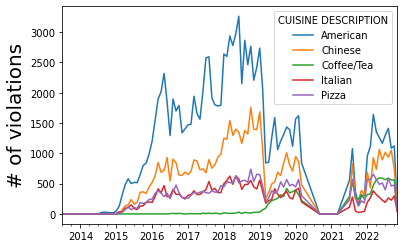

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
top_cuisines.index = pd.to_datetime(top_cuisines['INSPECTION DATE'].values)
ts_cuisine = top_cuisines.groupby([top_cuisines.index.to_period('m'),
                                   top_cuisines['CUISINE DESCRIPTION']]) \
                         .size().unstack().fillna(0)
ts_cuisine.plot()
plt.ylabel('# of violations', fontsize=20)
plt.savefig('violation_by_cuisine_ts.svg', bbox_inches='tight')

most popular restaurants in each boro.

In [ ]:
BORO = df[df['BORO']!='Missing'][['BORO','CRITICAL FLAG', 'INSPECTION DATE', 'CUISINE DESCRIPTION','CAMIS']]
BORO = df[df['BORO']!='Missing']
cuisine_by_boro = df.groupby('BORO')['CUISINE DESCRIPTION'] \
                        .value_counts().groupby(level=0).head(5) \
                        .reset_index(name='# of restaurants') 
cuisine_by_boro.set_index(['BORO','CUISINE DESCRIPTION'],inplace=True)

In [ ]:
By_boro_cuisine = BORO.groupby('BORO')['CUISINE DESCRIPTION'].value_counts()
result = pd.concat([cuisine_by_boro, By_boro_cuisine], axis=1, join='inner') 
#result[0] = (result[0] / result['# of restaurants']).apply(lambda x: '%.0f' %x)
result.rename(columns={0:'avg violations'}, inplace=True)

In [ ]:
result

# of restaurants  \
BORO          CUISINE DESCRIPTION                                                    
BRONX         American                                                        7694   
              Chinese                                                         6352   
              Pizza                                                           4623   
              Spanish                                                         3718   
              Latin (Cuban, Dominican, Puerto Rican, South & ...              3240   
BROOKLYN      American                                                       26278   
              Chinese                                                        18307   
              Caribbean                                                      10269   
              Pizza                                                           7747   
              Mexican                                                         7028   
MANHATTAN     American                                                       61427   
              Chinese                                                        14910   
              Italian                                                        13982   
              Japanese                                                       11580   
              CafÃ©/Coffee/Tea                                                9072   
QUEENS        American                                                       19449   
              Chinese                                                        18519   
              Pizza                                                           6961   
              Latin (Cuban, Dominican, Puerto Rican, South & ...              5942   
              Caribbean                                                       5892   
STATEN ISLAND American                                                        4382   
              Italian                                                         1902   
              Chinese                                                         1824   
              Pizza                                                           1538   
              Mexican                                                         1114   

                                                                  CUISINE DESCRIPTION  
BORO          CUISINE DESCRIPTION                                                      
BRONX         American                                                           7694  
              Chinese                                                            6352  
              Pizza                                                              4623  
              Spanish                                                            3718  
              Latin (Cuban, Dominican, Puerto Rican, South & ...                 3240  
BROOKLYN      American                                                          26278  
              Chinese                                                           18307  
              Caribbean                                                         10269  
              Pizza                                                              7747  
              Mexican                                                            7028  
MANHATTAN     American                                                          61427  
              Chinese                                                           14910  
              Italian                                                           13982  
              Japanese                                                          11580  
              CafÃ©/Coffee/Tea                                                   9072  
QUEENS        American                                                          19449  
              Chinese                                                           18519  
              Pizza                                                    

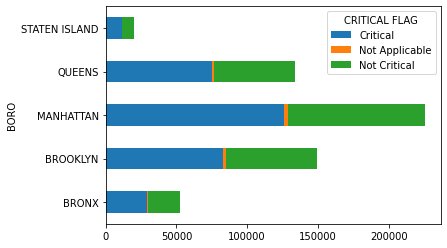

In [ ]:
by_boro = BORO.groupby(['BORO','CRITICAL FLAG'])
flag_by_boro = by_boro.size().unstack()
flag_by_boro.plot(kind='barh',stacked=True)

In [ ]:
# store data in csv file
df.to_csv(r'Final_DOHMH_New_York_City_Restaurant_Inspection_Results.csv', index=False)

Data Mining to create the association rules

Used the xls to do pivot table and considered the required attributes.

In [ ]:
ndf = pd.read_csv('Further_analysis.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
ndf.dtypes

CAMIS           object
02A            float64
02B            float64
02C            float64
02D            float64
                ...   
22F            float64
22G            float64
28-03          float64
(blank)        float64
Grand Total      int64
Length: 109, dtype: object

In [ ]:
ndf.columns

Index(['CAMIS', '02A', '02B', '02C', '02D', '02E', '02F', '02G', '02H', '02I',
       ...
       '20G', '22A', '22B', '22C', '22E', '22F', '22G', '28-03', '(blank)',
       'Grand Total'],
      dtype='object', length=109)

In [ ]:
ndf = ndf.drop('CAMIS', axis=1)

In [ ]:
ndf = ndf.drop('(blank)', axis=1)
ndf = ndf.drop('Grand Total', axis=1)

In [ ]:
import numpy as np

In [ ]:
ndf[:] = ndf.fillna(0)

In [ ]:
ndf[:] = ndf.astype(str).applymap(lambda x:  x).astype(float)

In [ ]:
ndf.head()

,02A,02B,02C,02D,02E,02F,02G,02H,02I,02J,...,20D,20F,20G,22A,22B,22C,22E,22F,22G,28-03
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ndf[:] = ndf.applymap(lambda x: x if x <= 1 else 1)

In [ ]:
ndf.head()

,02A,02B,02C,02D,02E,02F,02G,02H,02I,02J,...,20D,20F,20G,22A,22B,22C,22E,22F,22G,28-03
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


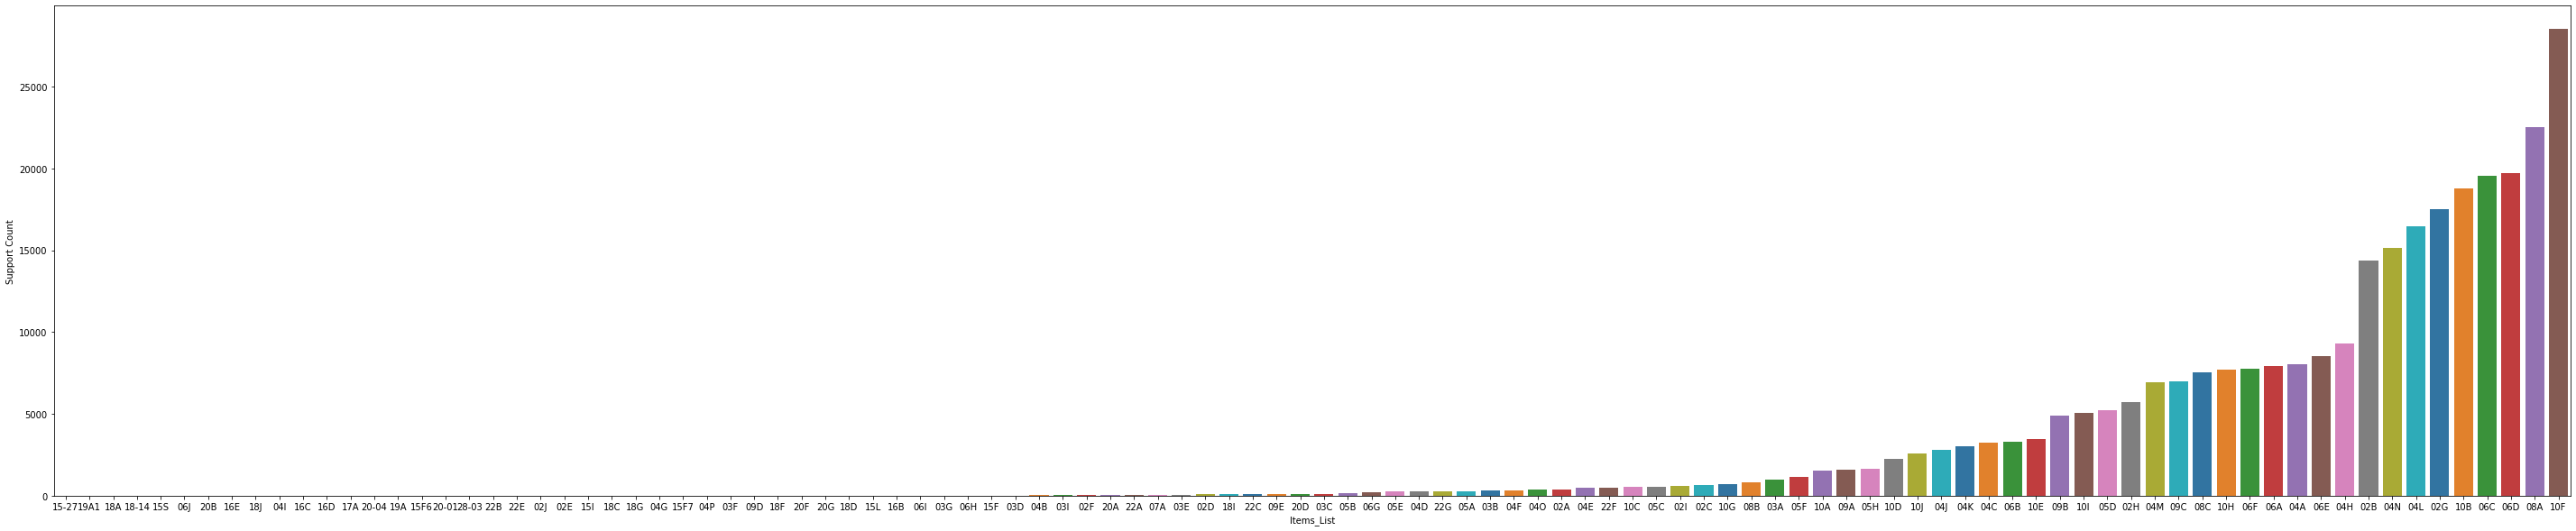

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
freq_given = []
for rep in ndf.columns:
    freq_given.append(ndf[rep].sum(axis=0))
given_data = pd.DataFrame()
given_data['Items_List'] = ndf.columns.values
given_data['Support Count']= freq_given

plt.figure(figsize=(50,10))
sns.barplot(data=given_data,x="Items_List",y="Support Count", order=given_data.sort_values('Support Count').Items_List,palette="tab10")


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
cbc_freq_items = apriori(ndf, min_support=0.05, use_colnames=True)
cbc_freq_items

,support,itemsets
0,0.429421,(02B)
1,0.523666,(02G)
2,0.171308,(02H)
3,0.239975,(04A)
4,0.097442,(04C)
...,...,...
6292,0.050379,"(10F, 06F, 10B, 06C, 04L, 08A, 06D, 04N)"
6293,0.053248,"(10F, 10B, 08C, 06C, 04L, 08A, 06D, 04N)"
6294,0.051186,"(10F, 02B, 04H, 10B, 06C, 08A, 02G, 06D, 04N)"
6295,0.072282,"(10F, 02B, 10B, 06C, 04L, 08A, 02G, 06D, 04N)"


In [ ]:
cdc_rules = association_rules(cbc_freq_items, metric="confidence", min_threshold=0.5)
cdc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(02B),(02G),0.429421,0.523666,0.302426,0.704266,1.344876,0.077553,1.610682
1,(02G),(02B),0.523666,0.429421,0.302426,0.577518,1.344876,0.077553,1.350540
2,(02H),(02B),0.171308,0.429421,0.120510,0.703471,1.638186,0.046947,1.924194
3,(04C),(02B),0.097442,0.429421,0.058716,0.602576,1.403229,0.016873,1.435693
4,(04H),(02B),0.277446,0.429421,0.141009,0.508239,1.183545,0.021868,1.160277
...,...,...,...,...,...,...,...,...,...
85439,"(06C, 02G, 04H, 04N)","(10F, 10B, 04L, 08A, 06D)",0.104912,0.220612,0.055788,0.531757,2.410374,0.032643,1.664496
85440,"(04L, 02G, 04H, 06D)","(10F, 10B, 06C, 08A, 04N)",0.102402,0.211917,0.055788,0.544791,2.570782,0.034087,1.731258
85441,"(04L, 02G, 04H, 04N)","(10F, 10B, 06C, 08A, 06D)",0.092572,0.220971,0.055788,0.602647,2.727272,0.035332,1.960547
85442,"(04L, 04N, 04H, 06D)","(10F, 10B, 06C, 08A, 02G)",0.102134,0.214905,0.055788,0.546226,2.541712,0.033839,1.730146


The output shows the relation beween the violation code interms of antecedents and consequents.

In [ ]:
cdc_req_rules=cdc_rules.sort_values(by='lift', ascending=False).head(10)
cdc_req_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
85059,"(10F, 02B, 04H, 10B, 08A)","(06C, 02G, 06D, 04N)",0.095739,0.173788,0.051186,0.534644,3.076410,0.034548,1.775441
85104,"(02B, 10B, 04H, 08A)","(10F, 06C, 02G, 06D, 04N)",0.098966,0.168171,0.051186,0.517210,3.075507,0.034543,1.722964
85102,"(10F, 02B, 04H, 04N)","(10B, 06C, 08A, 02G, 06D)",0.096277,0.173997,0.051186,0.531657,3.055546,0.034434,1.763671
78409,"(02B, 10B, 04H, 08A)","(06C, 02G, 06D, 04N)",0.098966,0.173788,0.052142,0.526872,3.031688,0.034943,1.746275
85116,"(02B, 04H, 04N)","(10F, 10B, 06C, 08A, 02G, 06D)",0.100251,0.169485,0.051186,0.510581,3.012537,0.034195,1.696941
56528,"(06C, 02H, 04N)","(02B, 02G, 10B, 08A)",0.088299,0.191687,0.050947,0.576988,3.010052,0.034022,1.910852
85095,"(04H, 10B, 06C, 08A, 02G)","(10F, 02B, 06D, 04N)",0.101088,0.168948,0.051186,0.506355,2.997115,0.034108,1.683503
85068,"(10F, 02B, 04H, 08A, 06D)","(06C, 02G, 10B, 04N)",0.099116,0.172474,0.051186,0.516431,2.994259,0.034091,1.711288
78423,"(02B, 04H, 04N)","(10B, 06C, 08A, 02G, 06D)",0.100251,0.173997,0.052142,0.520119,2.989234,0.034699,1.721266
85063,"(10F, 02B, 04H, 06C, 08A)","(04N, 02G, 10B, 06D)",0.098428,0.175073,0.051186,0.520036,2.970394,0.033954,1.718728
